In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


IMPORTING DATASET FROM CSV FILE

In [ ]:
df=pd.read_csv("breast-cancer.csv")

In [ ]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

LABEL ENCODING

In [ ]:
label_encoder=LabelEncoder()

In [ ]:
labels=label_encoder.fit_transform(df.diagnosis)

In [ ]:
df['Target']=labels

In [ ]:

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Target
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [ ]:
df.shape

(569, 33)

In [ ]:
df=df.drop('diagnosis', axis=1)

In [ ]:
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Target
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


DATA VISUALIZATION

<Axes: >

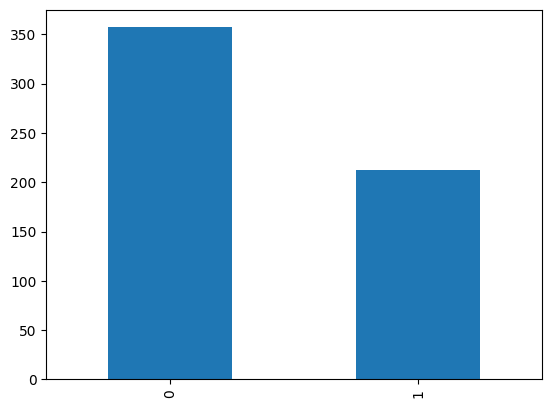

In [ ]:
df['Target'].value_counts().plot(kind='bar')

<Axes: ylabel='Target'>

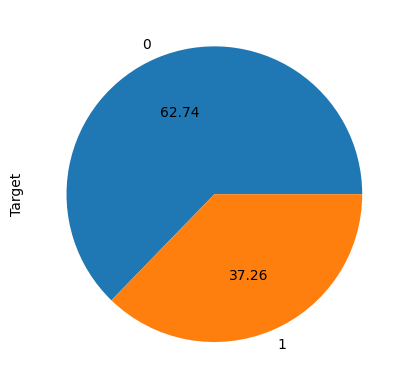

In [ ]:
df['Target'].value_counts().plot(kind='pie',autopct='%.2f')

(array([ 19.,  79., 185., 129.,  55.,  50.,  38.,   7.,   4.,   3.]),
 array([ 6.981 ,  9.0939, 11.2068, 13.3197, 15.4326, 17.5455, 19.6584,
        21.7713, 23.8842, 25.9971, 28.11  ]),
 <BarContainer object of 10 artists>)

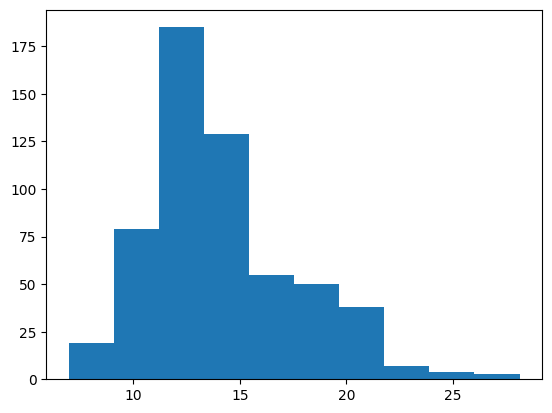

In [ ]:
plt.hist(df['radius_mean'])

(array([ 17.,  96., 154., 145.,  89.,  40.,  21.,   4.,   2.,   1.]),
 array([ 9.71 , 12.667, 15.624, 18.581, 21.538, 24.495, 27.452, 30.409,
        33.366, 36.323, 39.28 ]),
 <BarContainer object of 10 artists>)

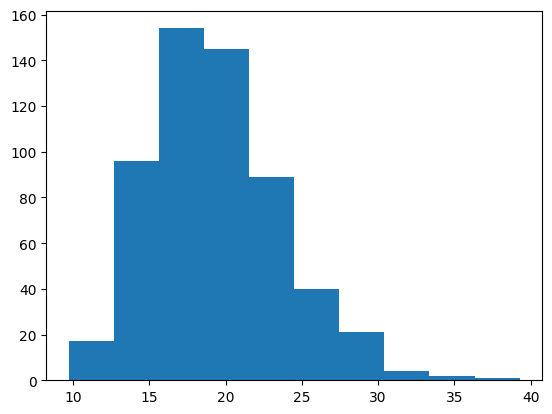

In [ ]:
plt.hist(df['texture_mean'])

(array([ 15.,  93., 185., 116.,  62.,  49.,  34.,   8.,   3.,   4.]),
 array([ 43.79 ,  58.261,  72.732,  87.203, 101.674, 116.145, 130.616,
        145.087, 159.558, 174.029, 188.5  ]),
 <BarContainer object of 10 artists>)

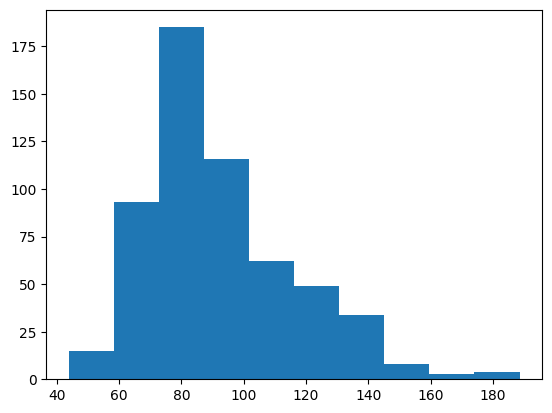

In [ ]:
plt.hist(df['perimeter_mean'])

(array([ 93., 251., 101.,  47.,  51.,  14.,   6.,   3.,   1.,   2.]),
 array([ 143.5 ,  379.25,  615.  ,  850.75, 1086.5 , 1322.25, 1558.  ,
        1793.75, 2029.5 , 2265.25, 2501.  ]),
 <BarContainer object of 10 artists>)

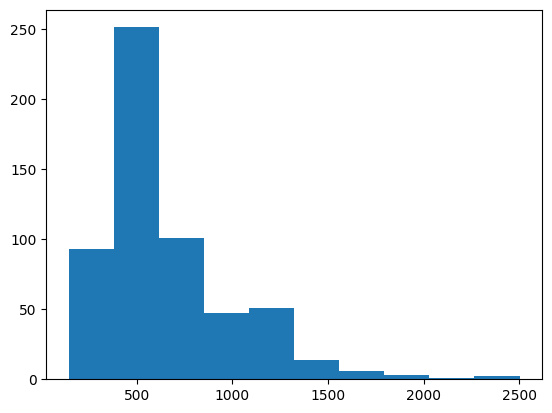

In [ ]:
plt.hist(df['area_mean'])

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


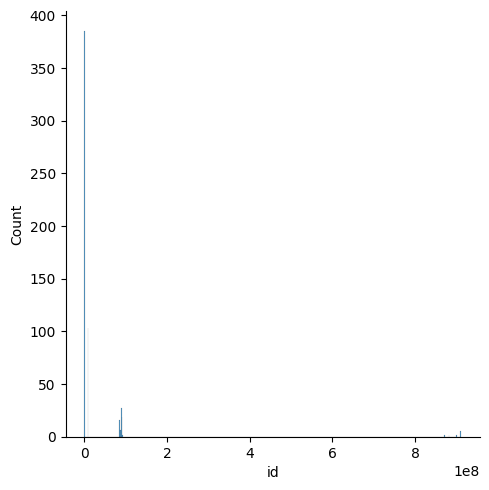

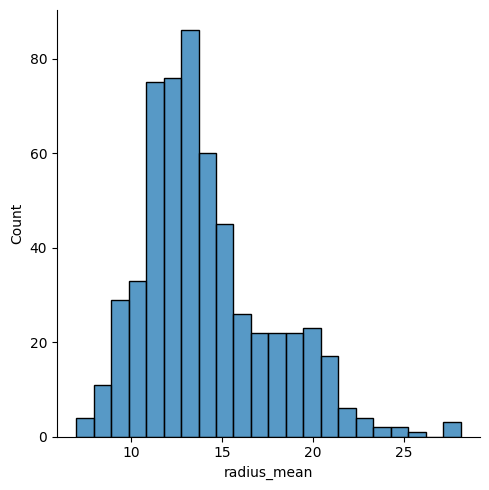

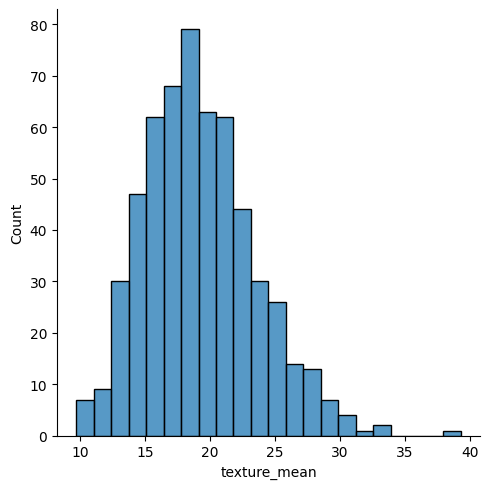

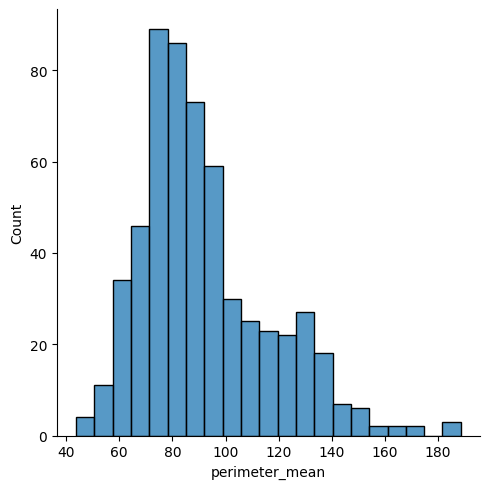

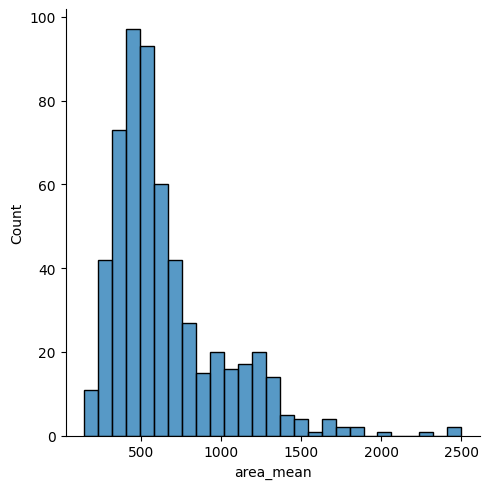

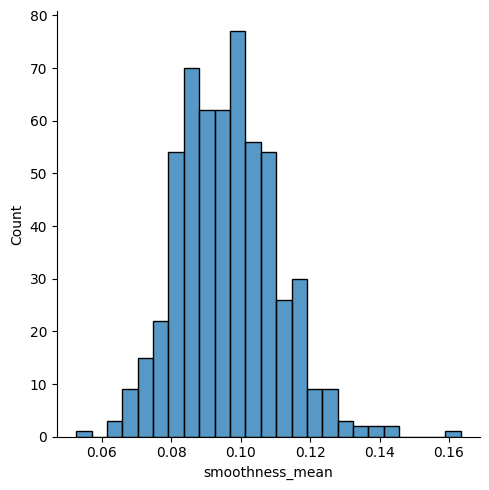

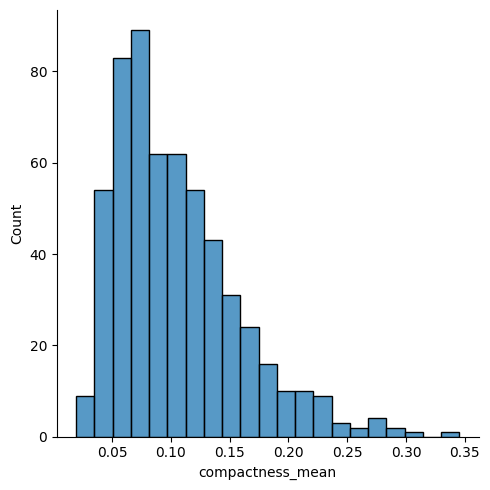

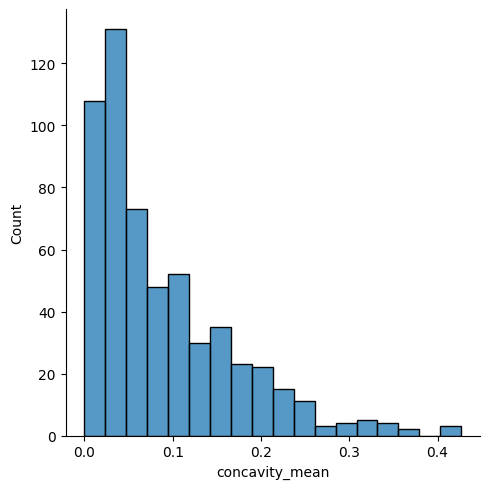

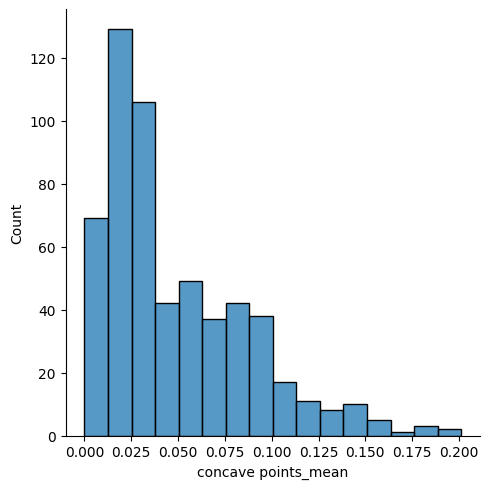

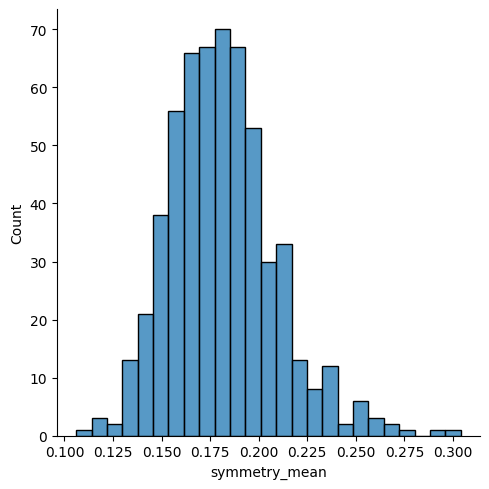

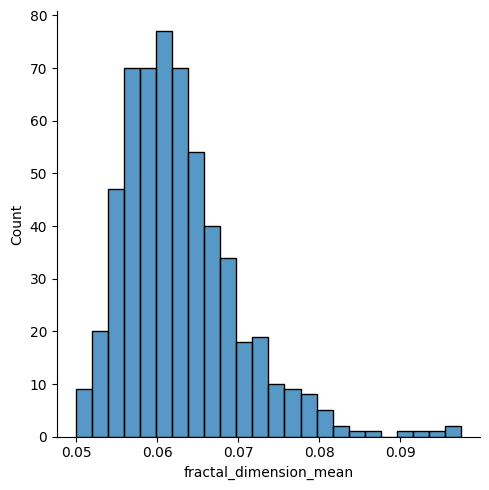

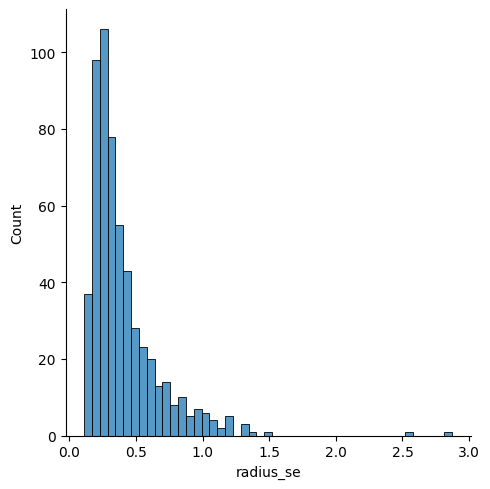

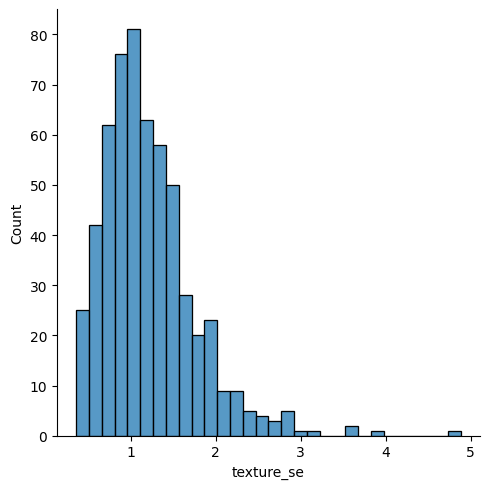

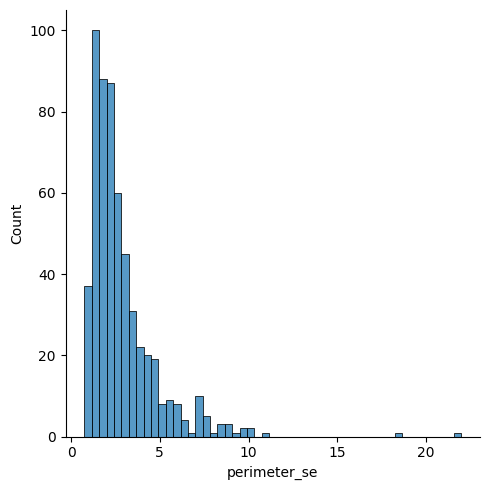

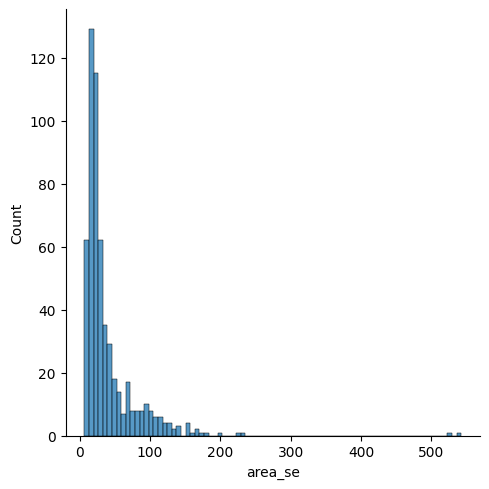

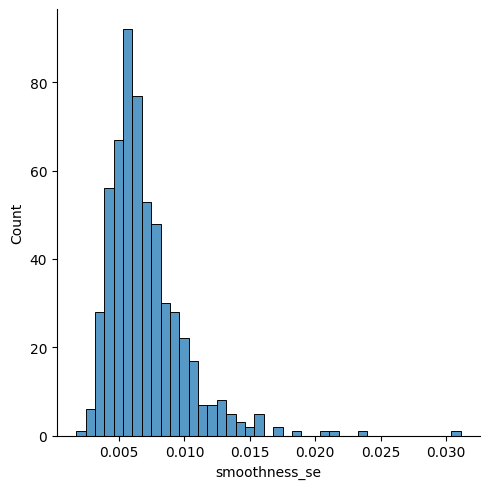

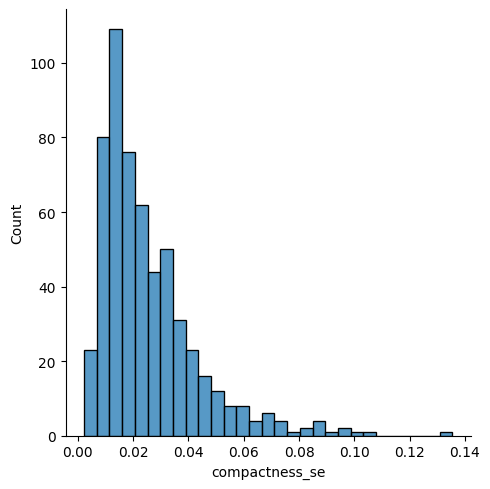

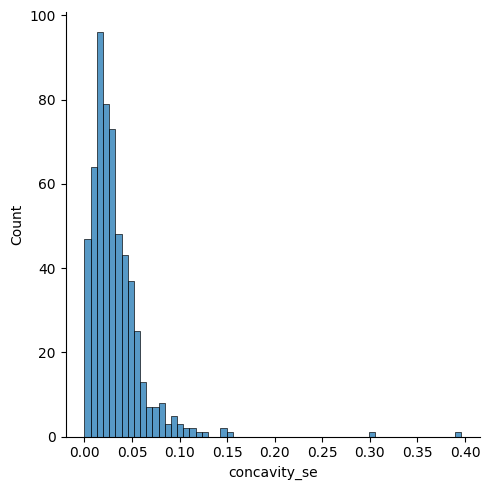

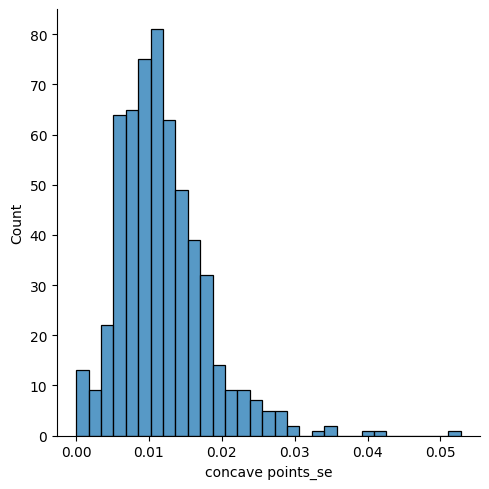

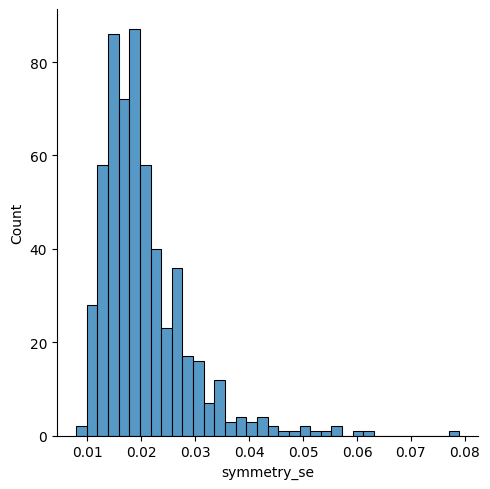

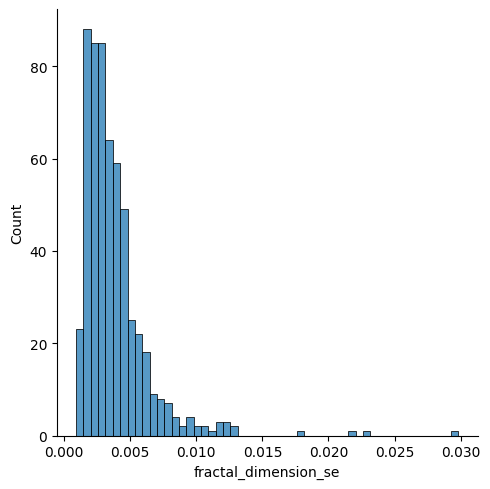

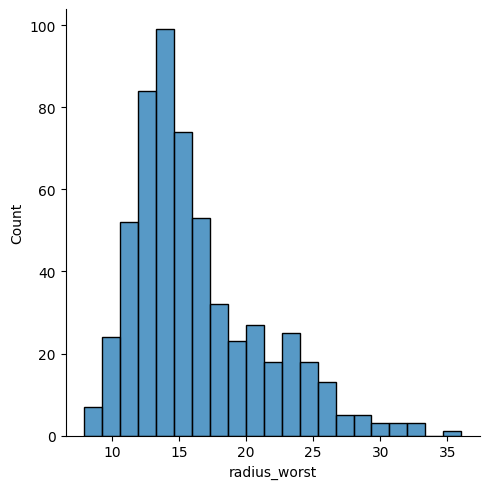

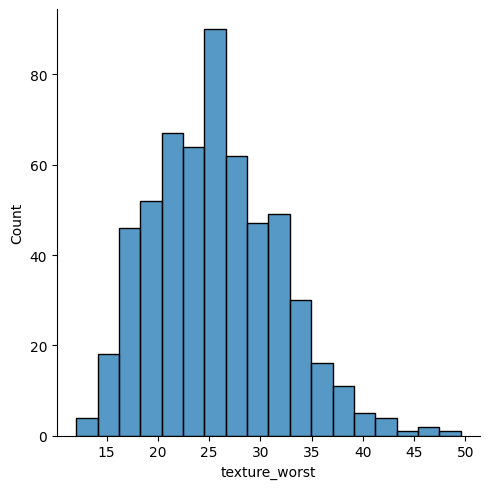

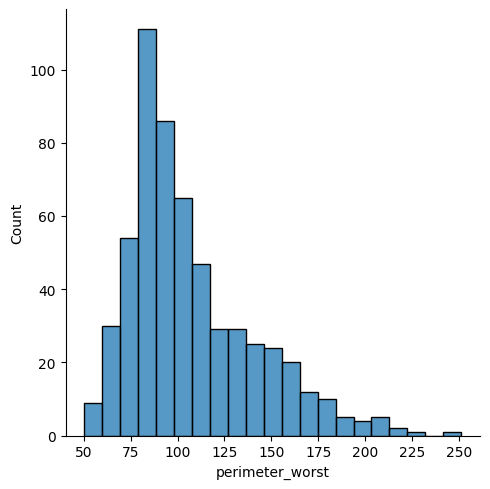

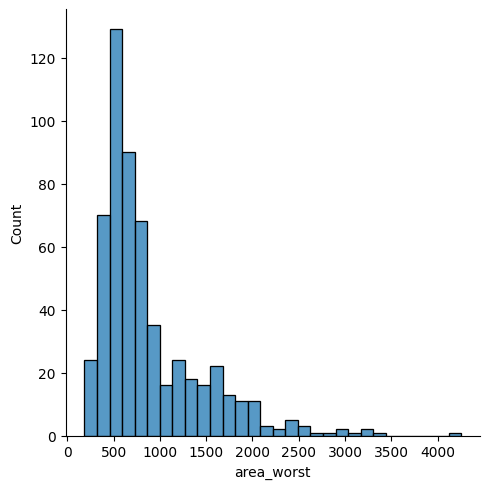

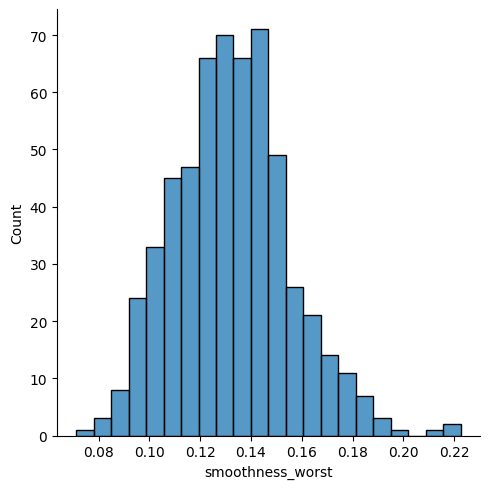

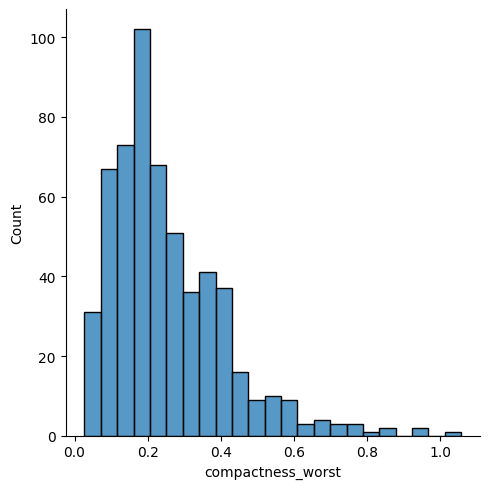

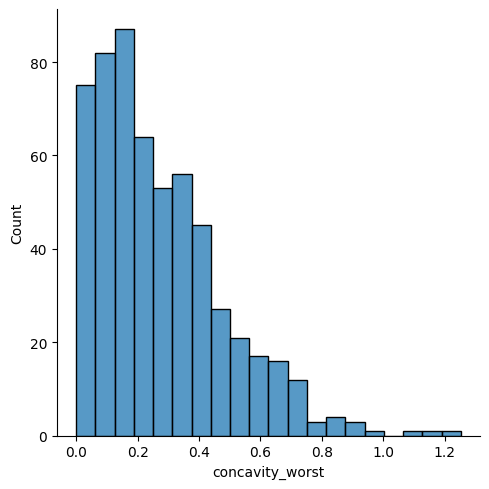

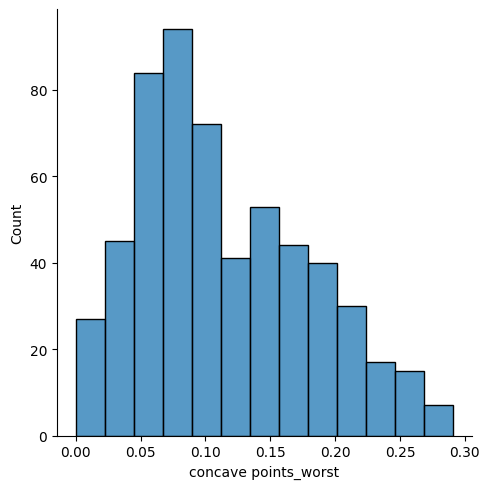

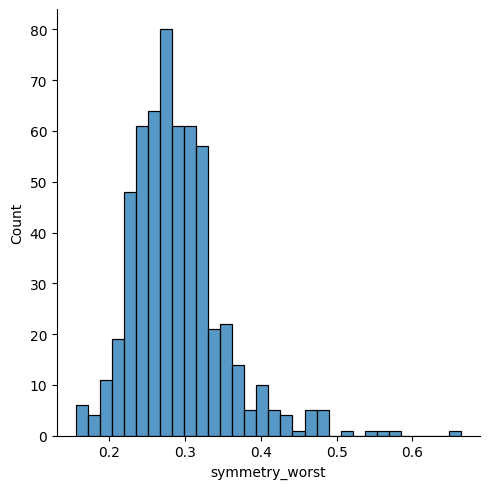

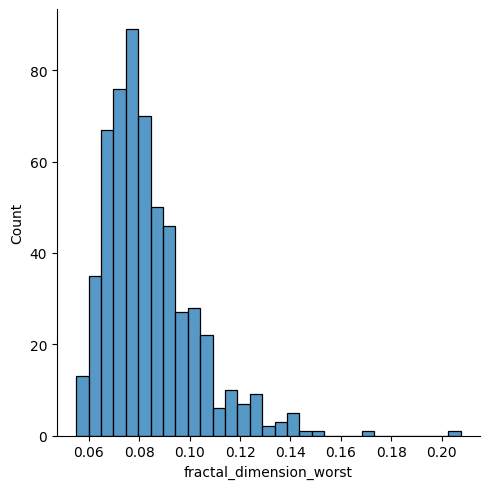

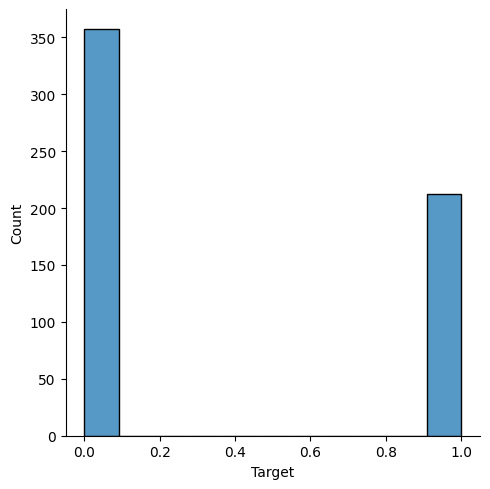

In [ ]:
for column in df:
  sns.displot(x=column, data=df)

<ipython-input-326-6a769597b756>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


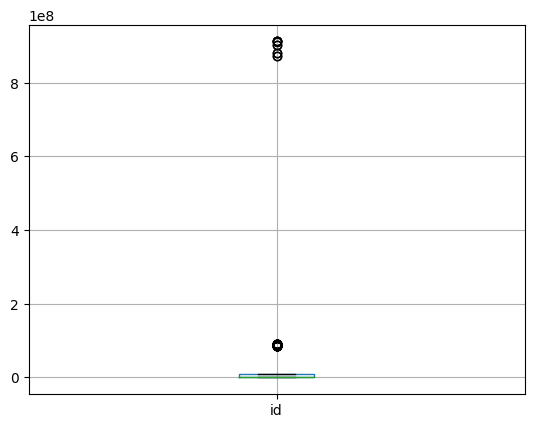

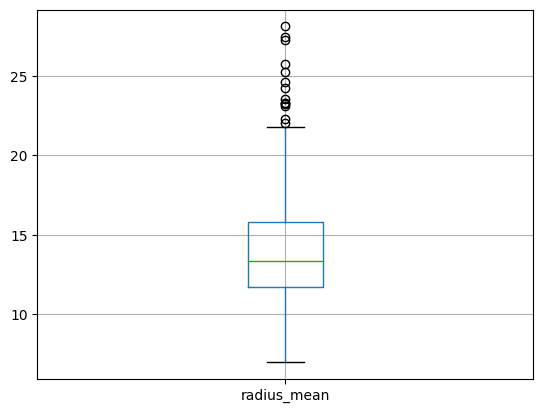

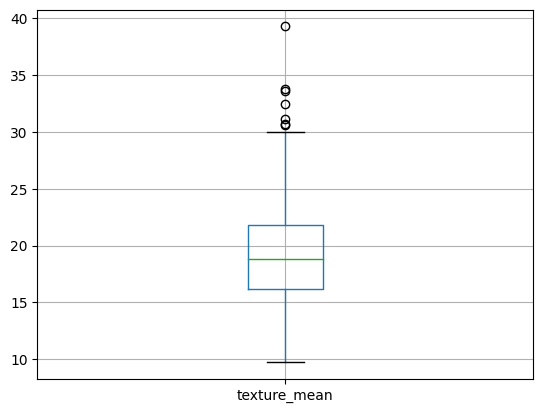

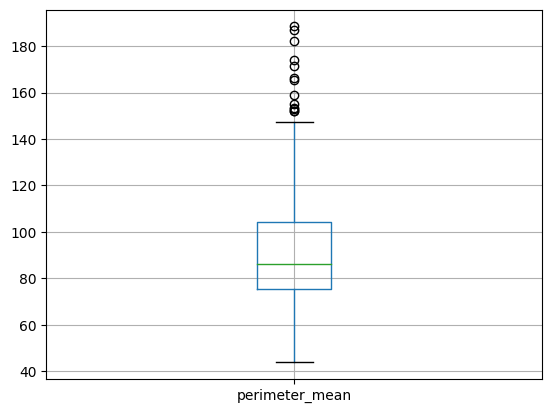

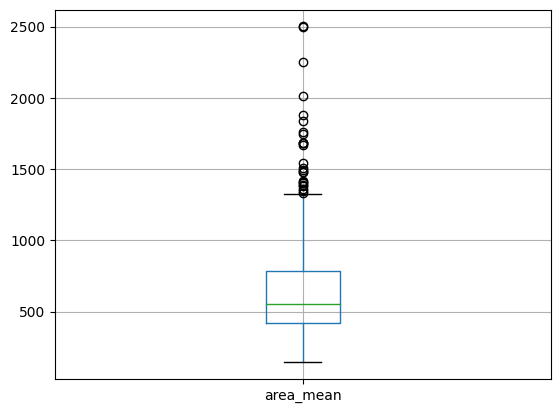

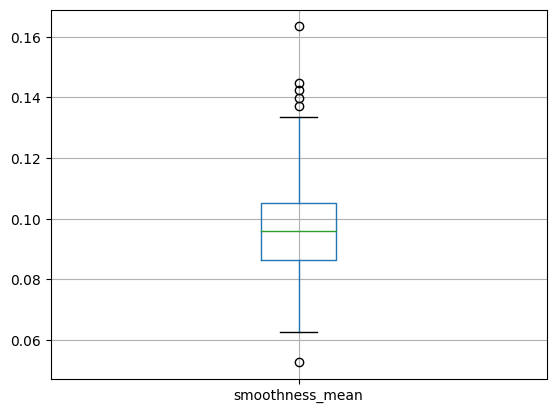

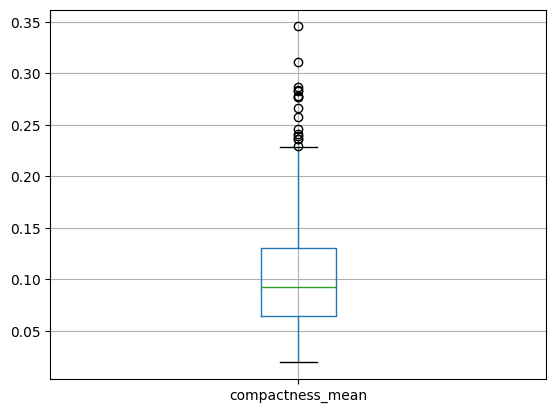

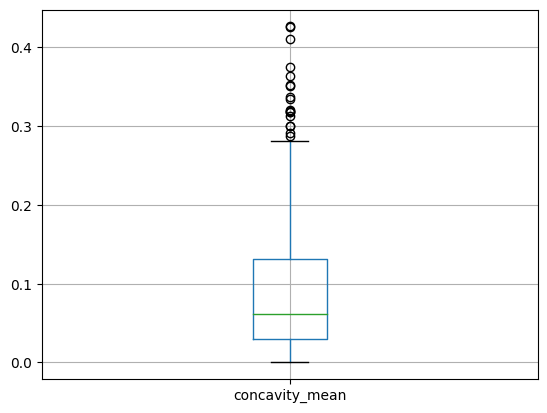

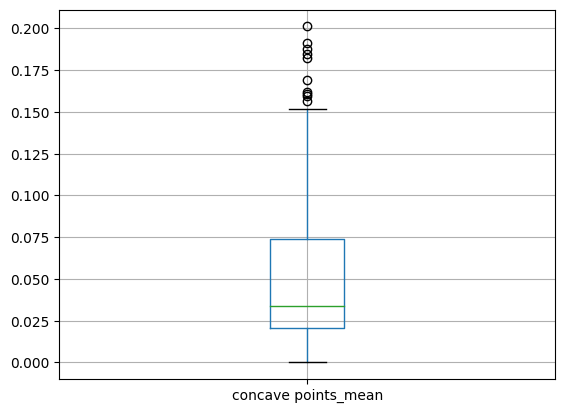

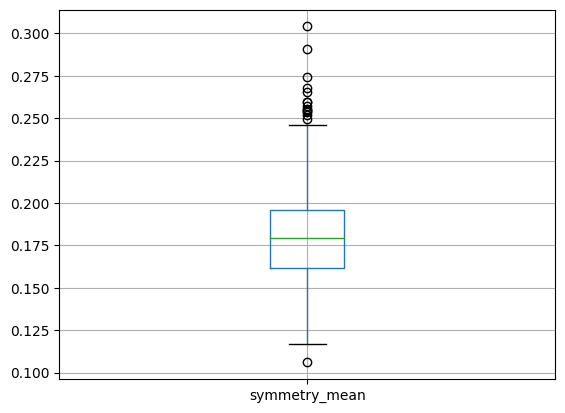

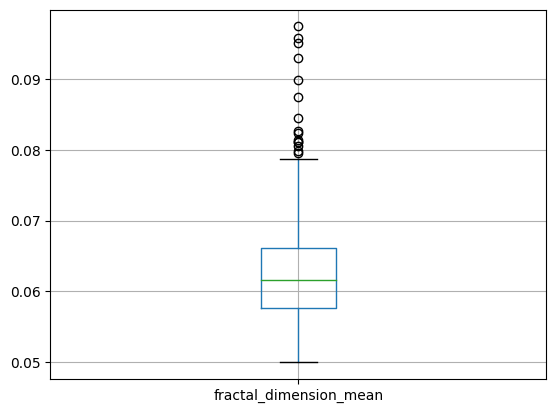

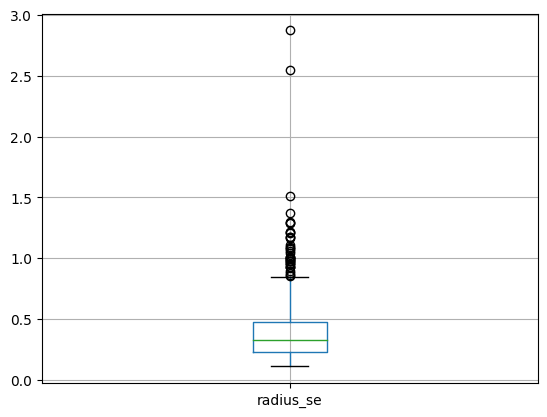

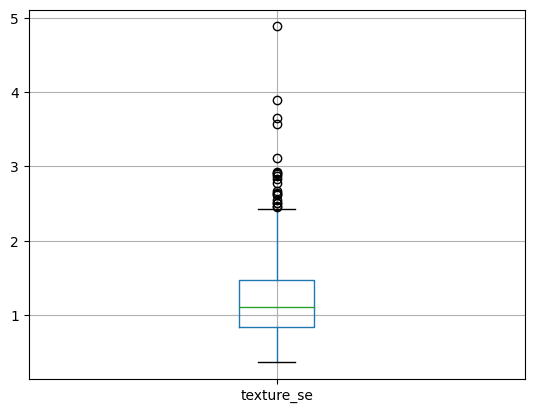

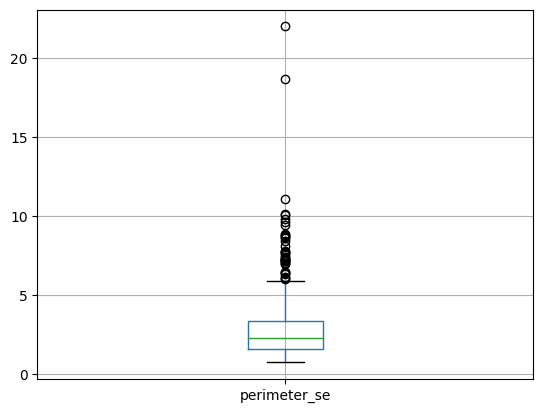

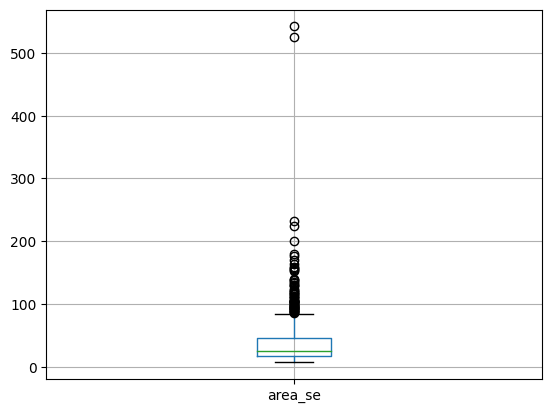

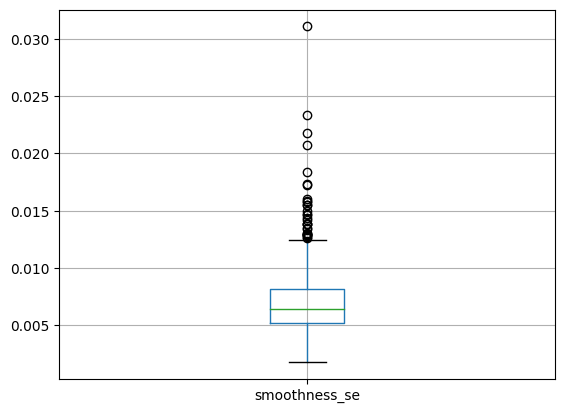

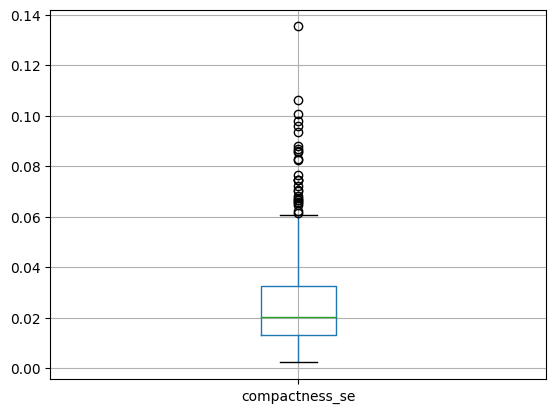

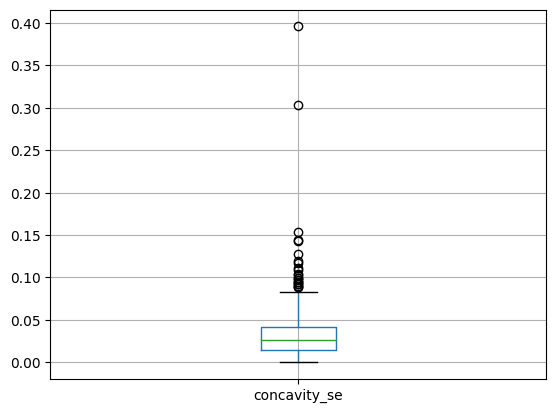

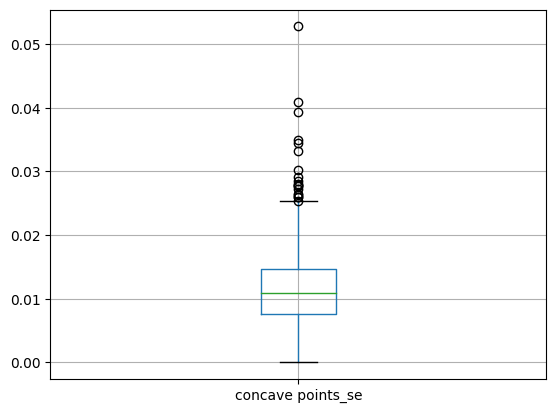

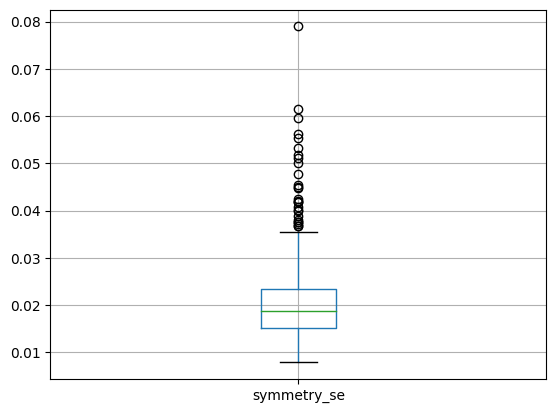

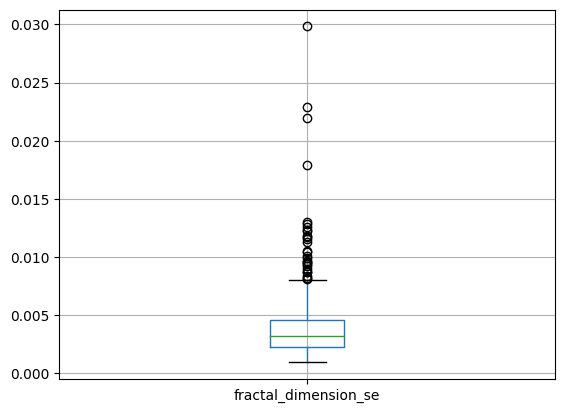

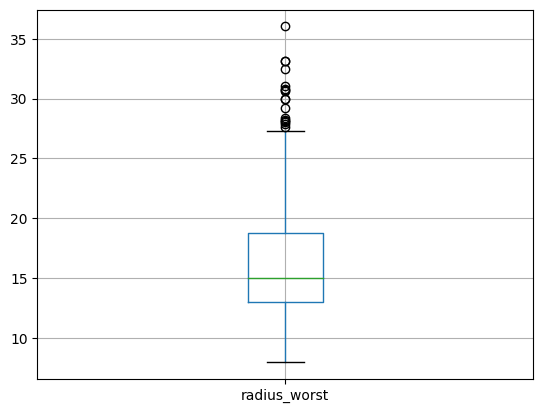

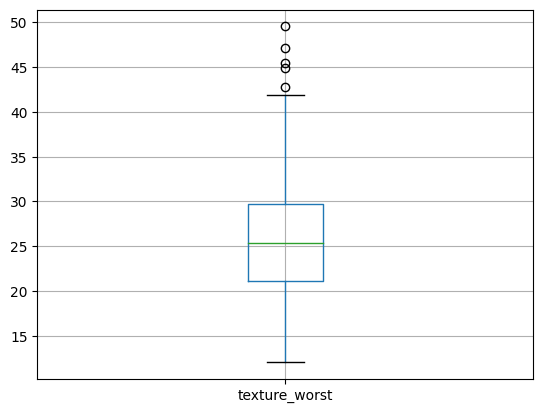

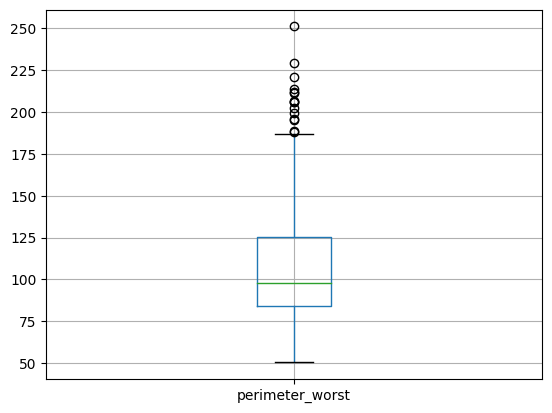

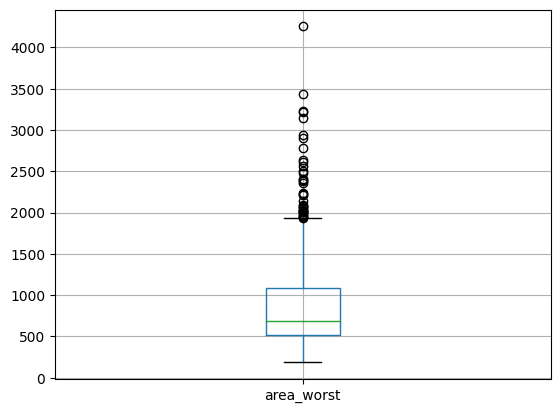

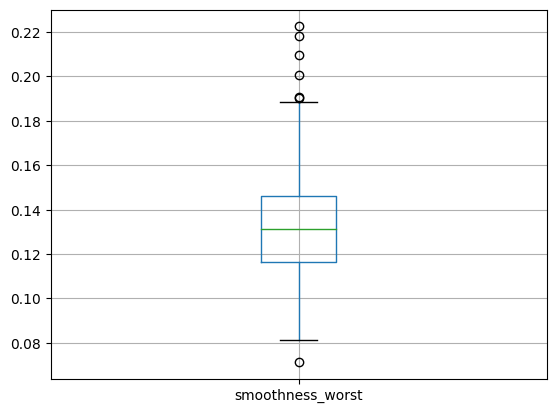

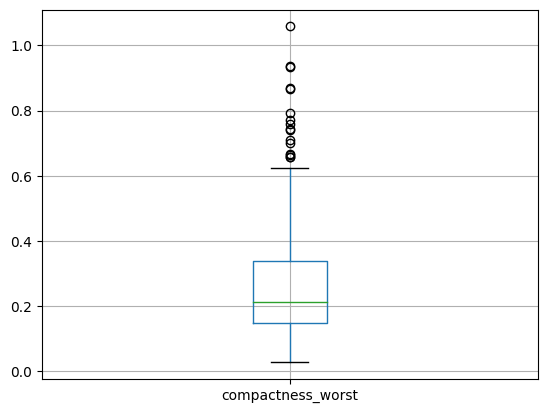

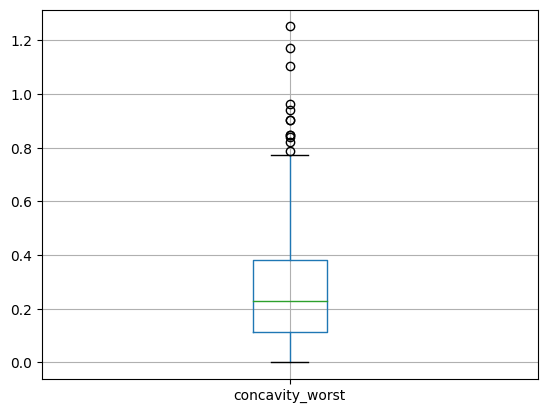

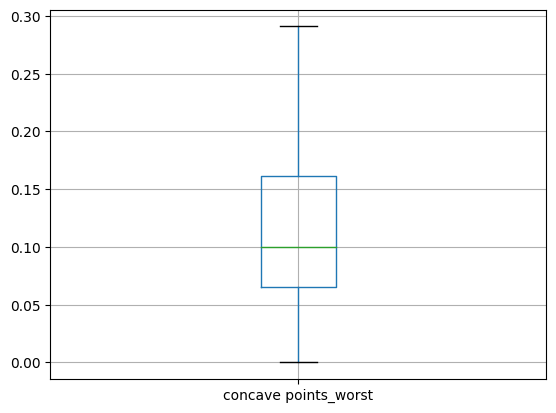

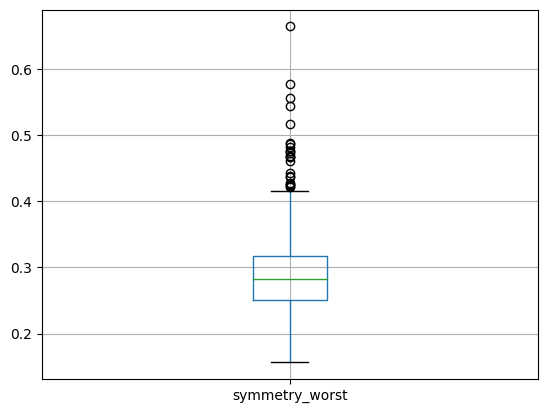

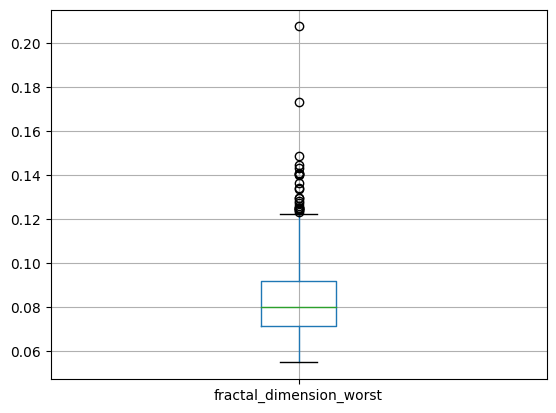

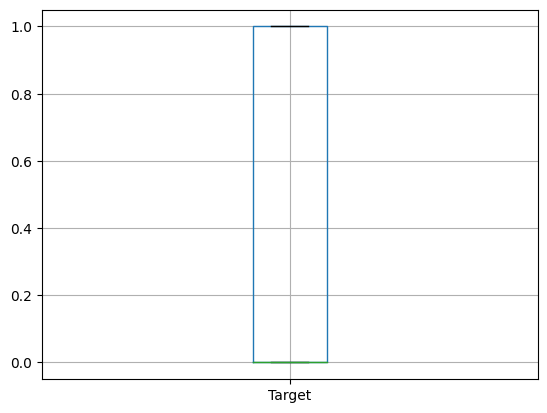

In [ ]:
for column in df:
    plt.figure()
    df.boxplot([column])

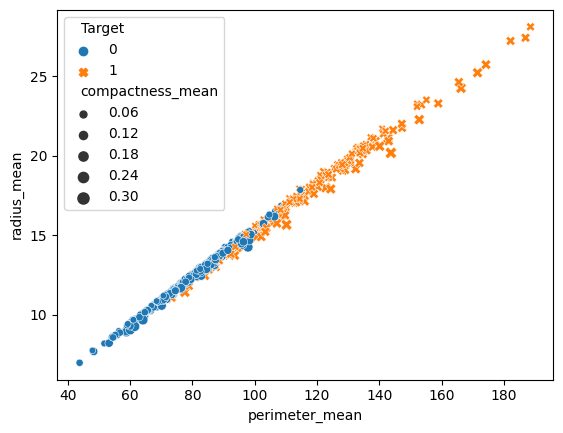

In [ ]:

sns.scatterplot(data=df, x='perimeter_mean', y='radius_mean',hue=df['Target'],style=df['Target'],size=df['compactness_mean'])
plt.show()

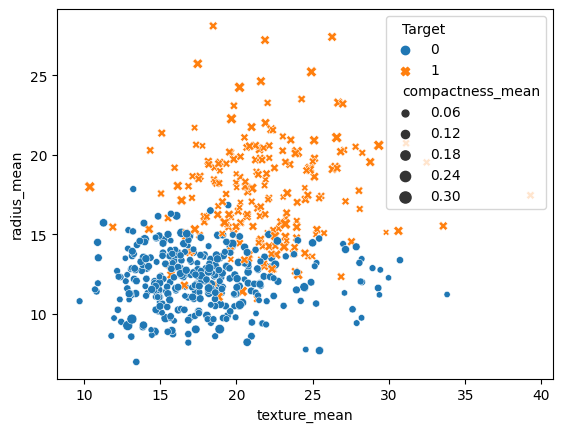

In [ ]:
sns.scatterplot(data=df, x='texture_mean', y='radius_mean',hue=df['Target'],style=df['Target'],size=df['compactness_mean'])
plt.show()

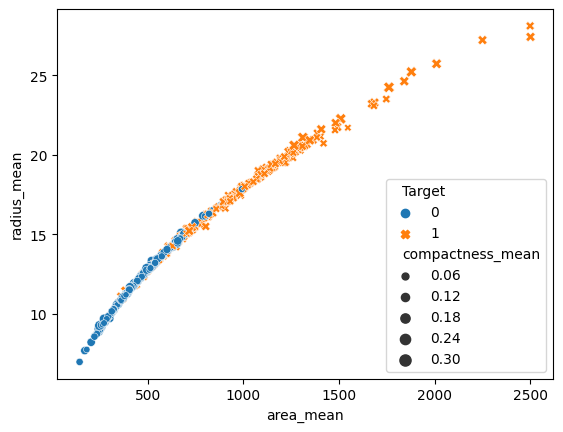

In [ ]:
sns.scatterplot(data=df, x='area_mean', y='radius_mean',hue=df['Target'],style=df['Target'],size=df['compactness_mean'])
plt.show()

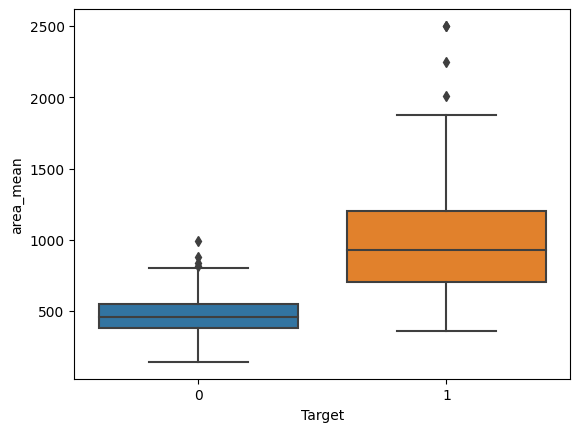

In [ ]:
sns.boxplot(data=df,x='Target',y='area_mean')
plt.show()

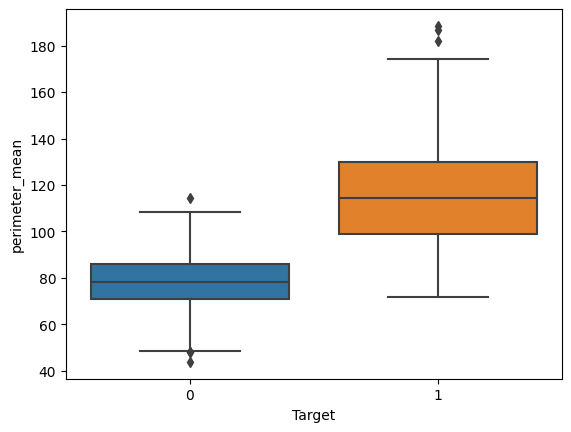

In [ ]:

sns.boxplot(data=df,x='Target',y='perimeter_mean')
plt.show()

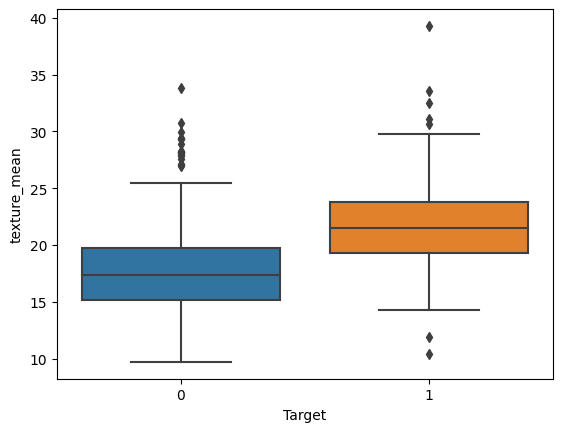

In [ ]:

sns.boxplot(data=df,x='Target',y='texture_mean')
plt.show()

In [ ]:
correlation_matrix = df.corr()

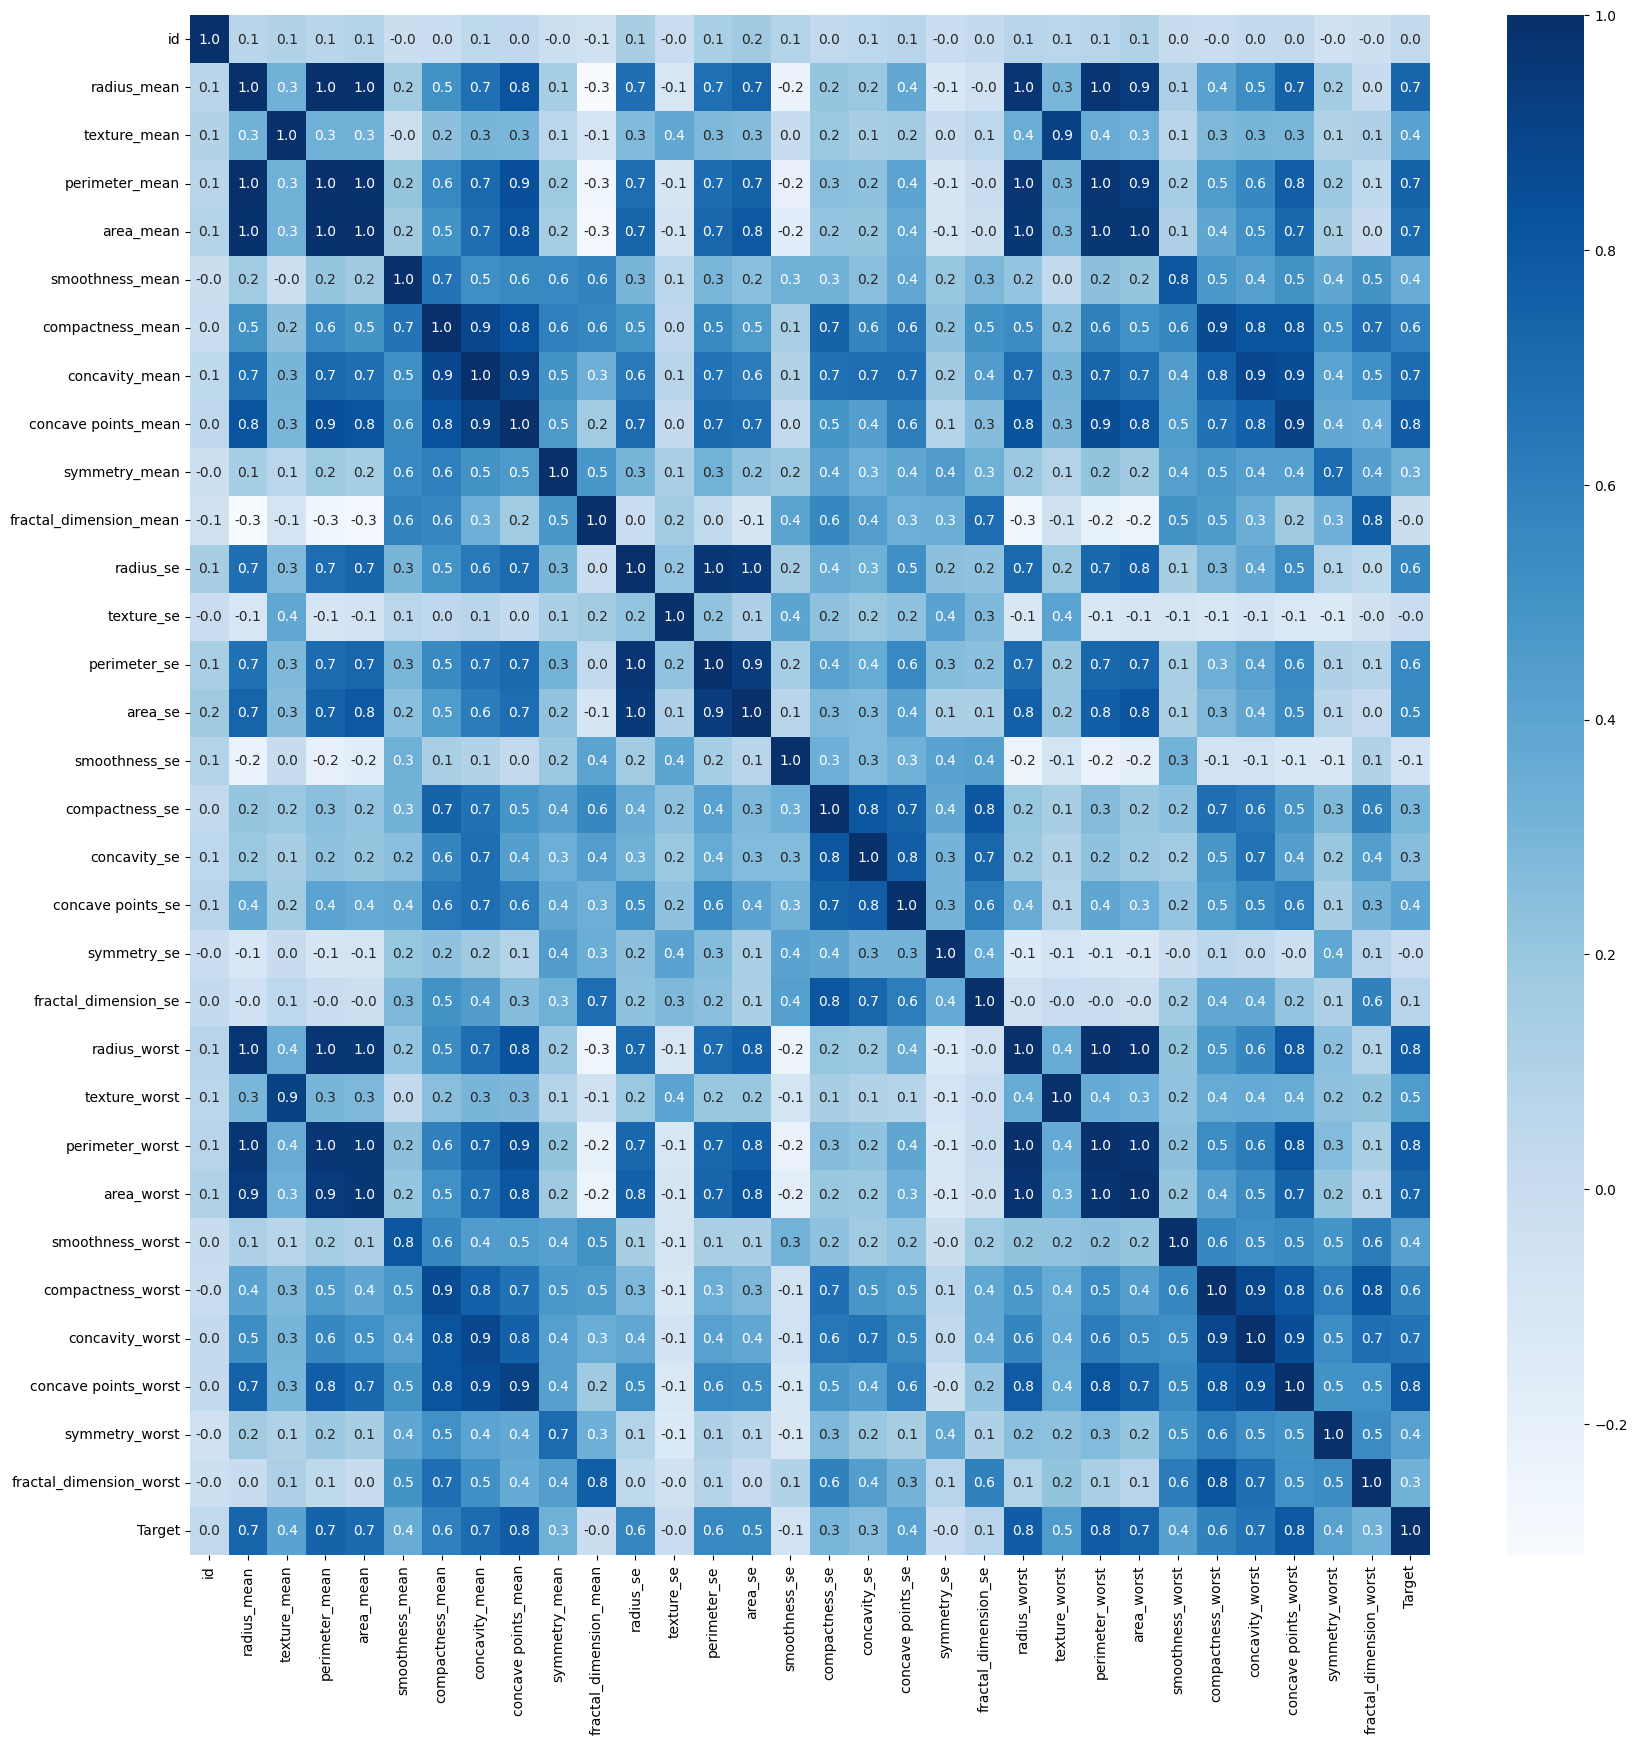

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, cbar=True, fmt='.1f', annot=True, cmap='Blues')
plt.savefig('Correlation Heat map')

MOST IMPORTANT FEATURE

In [ ]:
most_important_column = correlation_matrix.abs().idxmax().max()

print(f"The most important column is: {most_important_column}")

The most important column is: texture_worst


In [ ]:
df.shape

(569, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
df.isnull().sum()

id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
Target                     0
dtype: int64

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Target
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
df['Target'].value_counts()

0    357
1    212
Name: Target, dtype: int64

TARGET 0 constitutes a larger portion of the dataset, and TARGET 1 is underrepresented
therfore balancing the dataset

In [ ]:

benign = df[df.Target == 0]
malignant= df[df.Target == 1]

In [ ]:
print(benign.shape)
print(malignant.shape)

(357, 32)
(212, 32)


UNDERSAMPLING


In [ ]:
benign_sample = benign.sample(n=212)

In [ ]:
print(benign_sample.shape)

(212, 32)


In [ ]:
df = pd.concat([benign_sample, malignant], axis = 0)

In [ ]:
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Target
37,854941,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,0
154,8711002,13.150,15.34,85.31,538.9,0.09384,0.08498,0.09293,0.03483,0.1822,...,20.50,97.67,677.3,0.14780,0.22560,0.30090,0.09722,0.3849,0.08633,0
391,903483,8.734,16.84,55.27,234.3,0.10390,0.07428,0.00000,0.00000,0.1985,...,22.80,64.01,317.0,0.14600,0.13100,0.00000,0.00000,0.2445,0.08865,0
551,923780,11.130,22.44,71.49,378.4,0.09566,0.08194,0.04824,0.02257,0.2030,...,28.26,77.80,436.6,0.10870,0.17820,0.15640,0.06413,0.3169,0.08032,0
502,91505,12.540,16.32,81.25,476.3,0.11580,0.10850,0.05928,0.03279,0.1943,...,21.40,86.67,552.0,0.15800,0.17510,0.18890,0.08411,0.3155,0.07538,0


In [ ]:
df.tail()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Target
563,926125,20.92,25.09,143.0,1347.0,0.10990,0.2236,0.31740,0.14740,0.2149,...,29.41,179.1,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873,1
564,926424,21.56,22.39,142.0,1479.0,0.11100,0.1159,0.24390,0.13890,0.1726,...,26.40,166.1,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115,1
565,926682,20.13,28.25,131.2,1261.0,0.09780,0.1034,0.14400,0.09791,0.1752,...,38.25,155.0,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637,1
566,926954,16.60,28.08,108.3,858.1,0.08455,0.1023,0.09251,0.05302,0.1590,...,34.12,126.7,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820,1
567,927241,20.60,29.33,140.1,1265.0,0.11780,0.2770,0.35140,0.15200,0.2397,...,39.42,184.6,1821.0,0.1650,0.8681,0.9387,0.2650,0.4087,0.12400,1


In [ ]:
df['Target'].value_counts()

0    212
1    212
Name: Target, dtype: int64

In [ ]:
df.groupby('Target').mean()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
Target,,,,,,,,,,,,,,,,,,,,,
0,2.990294e+07,12.107486,18.074340,77.800802,459.335849,0.091909,0.079384,0.045266,0.025067,0.173153,...,13.325344,23.721840,86.806651,554.005660,0.124536,0.184833,0.165287,0.073279,0.268912,0.079698
1,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [ ]:
X=df.drop(columns='Target',axis=1)

In [ ]:
Y=df['Target']

In [ ]:
X

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
37,854941,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,...,13.30,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
154,8711002,13.150,15.34,85.31,538.9,0.09384,0.08498,0.09293,0.03483,0.1822,...,14.77,20.50,97.67,677.3,0.14780,0.22560,0.30090,0.09722,0.3849,0.08633
391,903483,8.734,16.84,55.27,234.3,0.10390,0.07428,0.00000,0.00000,0.1985,...,10.17,22.80,64.01,317.0,0.14600,0.13100,0.00000,0.00000,0.2445,0.08865
551,923780,11.130,22.44,71.49,378.4,0.09566,0.08194,0.04824,0.02257,0.2030,...,12.02,28.26,77.80,436.6,0.10870,0.17820,0.15640,0.06413,0.3169,0.08032
502,91505,12.540,16.32,81.25,476.3,0.11580,0.10850,0.05928,0.03279,0.1943,...,13.57,21.40,86.67,552.0,0.15800,0.17510,0.18890,0.08411,0.3155,0.07538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926125,20.920,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,...,24.29,29.41,179.10,1819.0,0.14070,0.41860,0.65990,0.25420,0.2929,0.09873
564,926424,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.45,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115
565,926682,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.69,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637
566,926954,16.600,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.98,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820


In [ ]:

Y

37     0
154    0
391    0
551    0
502    0
      ..
563    1
564    1
565    1
566    1
567    1
Name: Target, Length: 424, dtype: int64

DATA STANDARDIZATION

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
standardized_data = scaler.transform(X)

In [ ]:
print(standardized_data)

[[-0.2483652  -0.47291007 -0.33196598 ... -1.13313056 -1.47239821
  -1.25146966]
 [-0.1883394  -0.44057725 -1.05219627 ... -0.44576377  1.33979054
   0.03744853]
 [-0.24799431 -1.63042504 -0.70143477 ... -1.86487185 -0.78067831
   0.15880771]
 ...
 [-0.24781705  1.44011513  1.96669107 ...  0.51149921 -0.58886952
  -1.0066589 ]
 [-0.24781497  0.48899133  1.9269381  ...  0.20496486 -1.12351765
  -0.3878317 ]
 [-0.24781278  1.56675201  2.21923936 ...  2.00329972  1.69924324
   2.0079659 ]]


In [ ]:
X = standardized_data


In [ ]:
print(X)
print(Y)

[[-0.2483652  -0.47291007 -0.33196598 ... -1.13313056 -1.47239821
  -1.25146966]
 [-0.1883394  -0.44057725 -1.05219627 ... -0.44576377  1.33979054
   0.03744853]
 [-0.24799431 -1.63042504 -0.70143477 ... -1.86487185 -0.78067831
   0.15880771]
 ...
 [-0.24781705  1.44011513  1.96669107 ...  0.51149921 -0.58886952
  -1.0066589 ]
 [-0.24781497  0.48899133  1.9269381  ...  0.20496486 -1.12351765
  -0.3878317 ]
 [-0.24781278  1.56675201  2.21923936 ...  2.00329972  1.69924324
   2.0079659 ]]
37     0
154    0
391    0
551    0
502    0
      ..
563    1
564    1
565    1
566    1
567    1
Name: Target, Length: 424, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424 entries, 37 to 567
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       424 non-null    int64  
 1   radius_mean              424 non-null    float64
 2   texture_mean             424 non-null    float64
 3   perimeter_mean           424 non-null    float64
 4   area_mean                424 non-null    float64
 5   smoothness_mean          424 non-null    float64
 6   compactness_mean         424 non-null    float64
 7   concavity_mean           424 non-null    float64
 8   concave points_mean      424 non-null    float64
 9   symmetry_mean            424 non-null    float64
 10  fractal_dimension_mean   424 non-null    float64
 11  radius_se                424 non-null    float64
 12  texture_se               424 non-null    float64
 13  perimeter_se             424 non-null    float64
 14  area_se                  

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)


(424, 31) (339, 31) (85, 31)


In [ ]:
X_train

array([[-0.24846177,  0.86351317, -2.21204764, ...,  2.00913847,
         2.47554024,  1.74118494],
       [-0.24821673, -0.8285711 , -0.61959042, ..., -0.26067541,
        -0.58886952, -0.76603294],
       [-0.24825779, -1.35990711, -1.84024045, ..., -1.86487185,
         0.21612329, -0.21468563],
       ...,
       [-0.24787983, -0.73157264, -1.49649418, ..., -0.78572497,
        -0.27321568, -0.26647252],
       [-0.24799819, -0.69385101, -1.34449752, ..., -0.53071758,
        -0.43028745,  0.13736061],
       [-0.18604342, -0.69385101, -0.42550238, ..., -0.57611386,
         0.3867878 , -0.57091667]])

 LOGISTIC REGRESSION from sklearn

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:

X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [ ]:
print('Accuracy on training data = ', training_data_accuracy)

Accuracy on training data =  0.9852507374631269


In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [ ]:
print('Accuracy on test data = ', test_data_accuracy)

Accuracy on test data =  0.9764705882352941


In [ ]:
cf_matrix = confusion_matrix(Y_test, X_test_prediction)

print(cf_matrix)

[[41  1]
 [ 1 42]]


In [ ]:
tn, fp, fn, tp = cf_matrix.ravel()

print(tn, fp, fn, tp)

41 1 1 42


<Axes: >

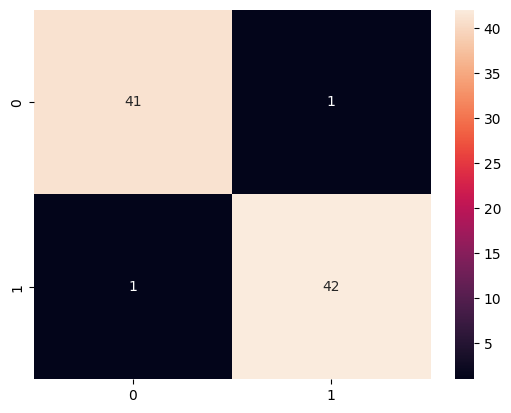

In [ ]:

sns.heatmap(cf_matrix, annot=True)

In [ ]:
def precision_recall_f1_score(true_labels, pred_labels):

  precision_value = precision_score(true_labels, pred_labels)
  recall_value = recall_score(true_labels, pred_labels)
  f1_score_value = f1_score(true_labels, pred_labels)

  print('Precision =',precision_value)
  print('Recall =',recall_value)
  print('F1 Score =',f1_score_value)

In [ ]:
precision_recall_f1_score(Y_train, X_train_prediction)

Precision = 0.9939759036144579
Recall = 0.9763313609467456
F1 Score = 0.9850746268656716


In [ ]:
precision_recall_f1_score(Y_test, X_test_prediction)

Precision = 0.9767441860465116
Recall = 0.9767441860465116
F1 Score = 0.9767441860465116


SUPPORT VECTOR MACHINE


In [ ]:
classifier=SVC(kernel='linear')

In [ ]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [ ]:

X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [ ]:

print('Accuracy score on training data = ', training_data_accuracy)

Accuracy score on training data =  0.9882005899705014


In [ ]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [ ]:
print('Accuracy score on test data = ', test_data_accuracy)

Accuracy score on test data =  0.9764705882352941


In [ ]:
cf_matrix = confusion_matrix(Y_test, X_test_prediction)

print(cf_matrix)

[[41  1]
 [ 1 42]]


In [ ]:
tn, fp, fn, tp = cf_matrix.ravel()

print(tn, fp, fn, tp)

41 1 1 42


<Axes: >

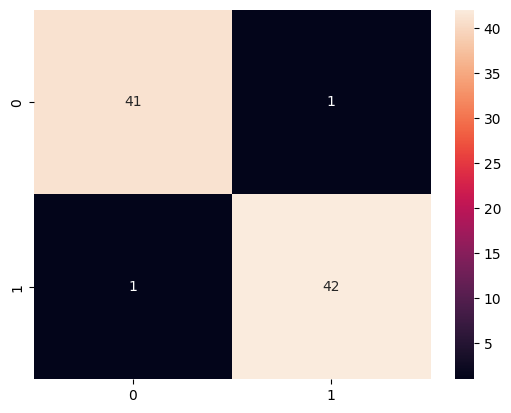

In [ ]:


sns.heatmap(cf_matrix, annot=True)

In [ ]:
def precision_recall_f1_score(true_labels, pred_labels):

  precision_value = precision_score(true_labels, pred_labels)
  recall_value = recall_score(true_labels, pred_labels)
  f1_score_value = f1_score(true_labels, pred_labels)

  print('Precision =',precision_value)
  print('Recall =',recall_value)
  print('F1 Score =',f1_score_value)

In [ ]:

precision_recall_f1_score(Y_train, X_train_prediction)

Precision = 0.9940119760479041
Recall = 0.9822485207100592
F1 Score = 0.988095238095238


In [ ]:
precision_recall_f1_score(Y_test, X_test_prediction)

Precision = 0.9767441860465116
Recall = 0.9767441860465116
F1 Score = 0.9767441860465116


KNN from sklearn

In [ ]:
classifier2 = KNeighborsClassifier(p=1)

In [ ]:
classifier2.fit(X_train, Y_train)

KNeighborsClassifier(p=1)

In [ ]:

y_pred = classifier2.predict(X_test)

In [ ]:
accuracy = accuracy_score(Y_test, y_pred)

In [ ]:
print(accuracy*100)

96.47058823529412


In [ ]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [ ]:
print('Accuracy on training data = ', training_data_accuracy)

Accuracy on training data =  0.9882005899705014


In [ ]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [ ]:
print('Accuracy score on test data = ', test_data_accuracy)

Accuracy score on test data =  0.9764705882352941


In [ ]:
cf_matrix = confusion_matrix(Y_test, X_test_prediction)

print(cf_matrix)

[[41  1]
 [ 1 42]]


In [ ]:
tn, fp, fn, tp = cf_matrix.ravel()

print(tn, fp, fn, tp)

41 1 1 42


<Axes: >

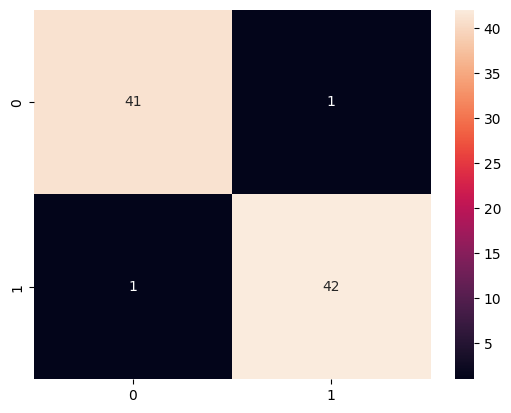

In [ ]:
sns.heatmap(cf_matrix, annot=True)

In [ ]:
def precision_recall_f1_score(true_labels, pred_labels):

  precision_value = precision_score(true_labels, pred_labels)
  recall_value = recall_score(true_labels, pred_labels)
  f1_score_value = f1_score(true_labels, pred_labels)

  print('Precision =',precision_value)
  print('Recall =',recall_value)
  print('F1 Score =',f1_score_value)

In [ ]:
precision_recall_f1_score(Y_train, X_train_prediction)

Precision = 0.9940119760479041
Recall = 0.9822485207100592
F1 Score = 0.988095238095238


In [ ]:
precision_recall_f1_score(Y_test, X_test_prediction)

Precision = 0.9767441860465116
Recall = 0.9767441860465116
F1 Score = 0.9767441860465116


RANDOM FORESTS

In [ ]:
classifier3=RandomForestClassifier()

In [ ]:
classifier3.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
y_pred=classifier3.predict(X_test)

In [ ]:
accuracy=accuracy_score(Y_test,y_pred)

In [ ]:

print(accuracy*100)

96.47058823529412


In [ ]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [ ]:
print('Accuracy on training data = ', training_data_accuracy)

Accuracy on training data =  0.9882005899705014


In [ ]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [ ]:
print('Accuracy score on test data = ', test_data_accuracy)

Accuracy score on test data =  0.9764705882352941


In [ ]:

cf_matrix = confusion_matrix(Y_test, X_test_prediction)

print(cf_matrix)

[[41  1]
 [ 1 42]]


In [ ]:
tn, fp, fn, tp = cf_matrix.ravel()

print(tn, fp, fn, tp)

41 1 1 42


<Axes: >

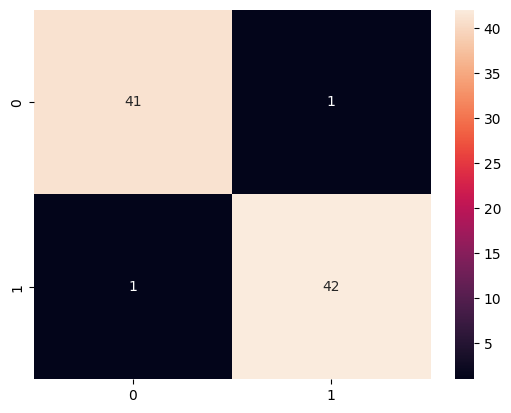

In [ ]:
sns.heatmap(cf_matrix, annot=True)

In [ ]:
def precision_recall_f1_score(true_labels, pred_labels):

  precision_value = precision_score(true_labels, pred_labels)
  recall_value = recall_score(true_labels, pred_labels)
  f1_score_value = f1_score(true_labels, pred_labels)

  print('Precision =',precision_value)
  print('Recall =',recall_value)
  print('F1 Score =',f1_score_value)

In [ ]:
precision_recall_f1_score(Y_train, X_train_prediction)

Precision = 0.9940119760479041
Recall = 0.9822485207100592
F1 Score = 0.988095238095238


In [ ]:
precision_recall_f1_score(Y_test, X_test_prediction)

Precision = 0.9767441860465116
Recall = 0.9767441860465116
F1 Score = 0.9767441860465116


CROSS VALIDATION

In [ ]:
models = [LogisticRegression(max_iter=1000), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier()]

In [ ]:
def compare_models_cross_validation():

  for model in models:

    cv_score = cross_val_score(model, X,Y, cv=5)

    mean_accuracy = sum(cv_score)/len(cv_score)

    mean_accuracy = mean_accuracy*100

    mean_accuracy = round(mean_accuracy, 2)

    print('Cross Validation accuracies for ', model, '=  ', cv_score)
    print('Accuracy % of the ', model, mean_accuracy)
    print('----------------------------------------------')


In [ ]:
compare_models_cross_validation()

Cross Validation accuracies for  LogisticRegression(max_iter=1000) =   [0.97647059 0.95294118 0.96470588 0.95294118 1.        ]
Accuracy % of the  LogisticRegression(max_iter=1000) 96.94
----------------------------------------------
Cross Validation accuracies for  SVC(kernel='linear') =   [0.96470588 0.94117647 0.96470588 0.95294118 1.        ]
Accuracy % of the  SVC(kernel='linear') 96.47
----------------------------------------------
Cross Validation accuracies for  KNeighborsClassifier() =   [0.95294118 0.92941176 0.95294118 0.95294118 0.98809524]
Accuracy % of the  KNeighborsClassifier() 95.53
----------------------------------------------
Cross Validation accuracies for  RandomForestClassifier() =   [0.88235294 0.96470588 0.97647059 0.97647059 0.98809524]
Accuracy % of the  RandomForestClassifier() 95.76
----------------------------------------------


HYPERPARAMETER TUNING

APPLICATION OF GRIDSearch CV ON EACH MODEL ONE BY ONE

SVM

In [ ]:
model = SVC()

In [ ]:
parameters = {
              'kernel':['linear','poly','rbf','sigmoid'],
              'C':[1, 5, 10, 20]
}

In [ ]:
classifier = GridSearchCV(model, parameters, cv=5)

In [ ]:
classifier.fit(X, Y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [ ]:
classifier.cv_results_

{'mean_fit_time': array([0.00632801, 0.00733433, 0.00608082, 0.00551653, 0.00656028,
        0.00762477, 0.01064897, 0.00458136, 0.00908723, 0.00645566,
        0.00669589, 0.00423265, 0.01343045, 0.00624962, 0.00656924,
        0.00513787]),
 'std_fit_time': array([0.00168607, 0.00054921, 0.00034214, 0.00020305, 0.00110943,
        0.00256605, 0.00200209, 0.00069557, 0.00217199, 0.00099302,
        0.00136831, 0.00041316, 0.00220845, 0.00063144, 0.00116154,
        0.00090229]),
 'mean_score_time': array([0.00185299, 0.00279074, 0.00347781, 0.00244508, 0.00163407,
        0.00216761, 0.00327325, 0.00182109, 0.00220275, 0.0021903 ,
        0.00267115, 0.00166869, 0.00196099, 0.00257225, 0.00268211,
        0.00187654]),
 'std_score_time': array([2.92595339e-04, 1.89394017e-04, 1.32506653e-03, 7.27569093e-04,
        9.03433907e-05, 1.42844416e-04, 7.46827999e-04, 9.06712345e-05,
        6.14560505e-04, 1.26861484e-04, 2.24309318e-04, 2.22594000e-04,
        1.41545799e-04, 7.23091036e-

In [ ]:
best_parameters = classifier.best_params_
print(best_parameters)

{'C': 5, 'kernel': 'rbf'}


In [ ]:

highest_accuracy = classifier.best_score_
print(highest_accuracy)

0.9764705882352942


In [ ]:
def precision_recall_f1_score(true_labels, pred_labels):

  precision_value = precision_score(true_labels, pred_labels)
  recall_value = recall_score(true_labels, pred_labels)
  f1_score_value = f1_score(true_labels, pred_labels)

  print('Precision =',precision_value)
  print('Recall =',recall_value)
  print('F1 Score =',f1_score_value)

In [ ]:
precision_recall_f1_score(Y_train, X_train_prediction)

Precision = 0.9940119760479041
Recall = 0.9822485207100592
F1 Score = 0.988095238095238


In [ ]:
precision_recall_f1_score(Y_test, X_test_prediction)

Precision = 0.9767441860465116
Recall = 0.9767441860465116
F1 Score = 0.9767441860465116


In [ ]:
result = pd.DataFrame(classifier.cv_results_)

In [ ]:
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006328,0.001686,0.001853,0.000293,1,linear,"{'C': 1, 'kernel': 'linear'}",0.964706,0.941176,0.964706,0.952941,1.000000,0.964706,0.019686,4
1,0.007334,0.000549,0.002791,0.000189,1,poly,"{'C': 1, 'kernel': 'poly'}",0.952941,0.976471,0.952941,0.952941,0.976190,0.962297,0.011459,6
2,0.006081,0.000342,0.003478,0.001325,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.988235,0.952941,0.964706,0.952941,1.000000,0.971765,0.019115,2
3,0.005517,0.000203,0.002445,0.000728,1,sigmoid,"{'C': 1, 'kernel': 'sigmoid'}",0.964706,0.964706,0.929412,0.941176,0.964286,0.952857,0.014816,9
4,0.006560,0.001109,0.001634,0.000090,5,linear,"{'C': 5, 'kernel': 'linear'}",0.988235,0.929412,0.941176,0.952941,1.000000,0.962353,0.027237,5


In [ ]:
grid_search_result = result[['param_C','param_kernel','mean_test_score']]

In [ ]:
grid_search_result

,param_C,param_kernel,mean_test_score
0,1,linear,0.964706
1,1,poly,0.962297
2,1,rbf,0.971765
3,1,sigmoid,0.952857
4,5,linear,0.962353
5,5,poly,0.943473
6,5,rbf,0.976471
7,5,sigmoid,0.926919
8,10,linear,0.957647
9,10,poly,0.945854


Highest Accuracy = 0.9811764705882353

Best Parameters = {'C': 5, 'kernel': 'rbf'}

LOGISTIC REGRESSION

In [ ]:
model=LogisticRegression()

In [ ]:
param_grid =[
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [ ]:
classifier = GridSearchCV(model, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [ ]:
classifier.fit(X, Y)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
2160 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: 

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}],
             verbose=True)

In [ ]:
classifier.fit(X,Y)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
2160 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: 

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}],
             verbose=True)

In [ ]:
classifier.cv_results_

{'mean_fit_time': array([7.60475794e-04, 7.56899516e-04, 2.00064977e-03, ...,
        7.46885935e-04, 9.93729671e-01, 8.85038296e-01]),
 'std_fit_time': array([1.92488451e-05, 1.17499864e-04, 6.73208773e-05, ...,
        1.07201140e-04, 1.03295526e-01, 2.10687614e-01]),
 'mean_score_time': array([0.        , 0.        , 0.00488663, ..., 0.        , 0.00176088,
        0.00128603]),
 'std_score_time': array([0.00000000e+00, 0.00000000e+00, 2.71828931e-03, ...,
        0.00000000e+00, 5.52234023e-05, 7.75255200e-05]),
 'param_C': masked_array(data=[0.0001, 0.0001, 0.0001, ..., 10000.0, 10000.0, 10000.0],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_iter': masked_array(data=[100, 100, 100, ..., 5000, 5000, 5000],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_penalty': masked_array(data=['l1', 'l1', 'l1', ..., 'none', 'none

In [ ]:


best_parameters = classifier.best_params_
print(best_parameters)

{'C': 0.23357214690901212, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:
highest_accuracy = classifier.best_score_
print(highest_accuracy)

0.9740452169280459


In [ ]:
def precision_recall_f1_score(true_labels, pred_labels):

  precision_value = precision_score(true_labels, pred_labels)
  recall_value = recall_score(true_labels, pred_labels)
  f1_score_value = f1_score(true_labels, pred_labels)

  print('Precision =',precision_value)
  print('Recall =',recall_value)
  print('F1 Score =',f1_score_value)

In [ ]:
precision_recall_f1_score(Y_train, X_train_prediction)

Precision = 0.9940119760479041
Recall = 0.9822485207100592
F1 Score = 0.988095238095238


In [ ]:
precision_recall_f1_score(Y_test, X_test_prediction)

Precision = 0.9767441860465116
Recall = 0.9767441860465116
F1 Score = 0.9767441860465116


In [ ]:

result = pd.DataFrame(classifier.cv_results_)

In [ ]:
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000760,0.000019,0.000000,0.000000,0.0001,100,l1,lbfgs,"{'C': 0.0001, 'max_iter': 100, 'penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,881
1,0.000757,0.000117,0.000000,0.000000,0.0001,100,l1,newton-cg,"{'C': 0.0001, 'max_iter': 100, 'penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,881
2,0.002001,0.000067,0.004887,0.002718,0.0001,100,l1,liblinear,"{'C': 0.0001, 'max_iter': 100, 'penalty': 'l1'...",0.5,0.503546,0.496454,0.5,0.002895,841
3,0.000691,0.000093,0.000000,0.000000,0.0001,100,l1,sag,"{'C': 0.0001, 'max_iter': 100, 'penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,881
4,0.004352,0.002838,0.001113,0.000111,0.0001,100,l1,saga,"{'C': 0.0001, 'max_iter': 100, 'penalty': 'l1'...",0.5,0.496454,0.503546,0.5,0.002895,841


In [ ]:
grid_search_result = result[['mean_test_score']].max()

In [ ]:
grid_search_result

mean_test_score    0.974045
dtype: float64

Highest Accuracy = 0.9811540638630839

Best Parameters = {'C': 0.23357214690901212, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}

KNN

In [ ]:
model= KNeighborsClassifier()

In [ ]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'leaf_size': [10, 20, 30, 40, 50]
}

In [ ]:
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=42)

In [ ]:
classifier=GridSearchCV(estimator=model,param_grid=param_grid,n_jobs=1,cv=cv,scoring="accuracy",error_score=0)

In [ ]:
classifier.fit(X, Y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=42),
             error_score=0, estimator=KNeighborsClassifier(), n_jobs=1,
             param_grid={'leaf_size': [10, 20, 30, 40, 50],
                         'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
classifier.cv_results_

{'mean_fit_time': array([0.00200311, 0.00214561, 0.00150604, 0.00093014, 0.00110132,
        0.0009316 , 0.00115899, 0.00095319, 0.00106413, 0.00088165,
        0.00102565, 0.00087202, 0.00108081, 0.00088151, 0.00103774,
        0.00098376, 0.00111231, 0.00098334, 0.00104272, 0.00104042,
        0.00106649, 0.00080755, 0.00115595, 0.00097082, 0.00116766,
        0.00100109, 0.00118686, 0.00094657, 0.0011946 , 0.00086377,
        0.00115921, 0.00097452, 0.00104334, 0.00098658, 0.00133216,
        0.00092645, 0.0011614 , 0.00085741, 0.00128151, 0.00101519,
        0.00122074, 0.00116621, 0.00111641, 0.00094492, 0.00107865,
        0.00084484, 0.00097135, 0.00095384, 0.00099254, 0.00087769,
        0.00098085, 0.00083532, 0.00103907, 0.00083973, 0.00105975,
        0.00090616, 0.00104679, 0.00088611, 0.00105426, 0.00099326,
        0.00110111, 0.00091162, 0.00264297, 0.00185612, 0.00129071,
        0.00089084, 0.00119367, 0.00134869, 0.00118566, 0.00096832,
        0.00106484, 0.00094924,

In [ ]:
best_parameters = classifier.best_params_
print(best_parameters)

{'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}


In [ ]:

highest_accuracy = classifier.best_score_
print(highest_accuracy)

0.9638796603912883


In [ ]:
def precision_recall_f1_score(true_labels, pred_labels):

  precision_value = precision_score(true_labels, pred_labels)
  recall_value = recall_score(true_labels, pred_labels)
  f1_score_value = f1_score(true_labels, pred_labels)

  print('Precision =',precision_value)
  print('Recall =',recall_value)
  print('F1 Score =',f1_score_value)

In [ ]:
precision_recall_f1_score(Y_train, X_train_prediction)

Precision = 0.9940119760479041
Recall = 0.9822485207100592
F1 Score = 0.988095238095238


In [ ]:
precision_recall_f1_score(Y_test, X_test_prediction)

Precision = 0.9767441860465116
Recall = 0.9767441860465116
F1 Score = 0.9767441860465116


In [ ]:

result = pd.DataFrame(classifier.cv_results_)

In [ ]:
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_leaf_size,param_metric,param_n_neighbors,param_weights,params,split0_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002003,0.001117,0.021307,0.035707,10,euclidean,3,uniform,"{'leaf_size': 10, 'metric': 'euclidean', 'n_ne...",0.976744,...,0.953488,0.952381,0.952381,1.0,1.0,0.97619,0.976190,0.957530,0.036797,101
1,0.002146,0.002399,0.032211,0.056394,10,euclidean,3,distance,"{'leaf_size': 10, 'metric': 'euclidean', 'n_ne...",0.976744,...,0.953488,0.952381,0.952381,1.0,1.0,0.97619,0.976190,0.957530,0.036797,101
2,0.001506,0.000786,0.007362,0.003705,10,euclidean,5,uniform,"{'leaf_size': 10, 'metric': 'euclidean', 'n_ne...",0.976744,...,0.953488,0.952381,0.952381,1.0,1.0,1.00000,0.952381,0.959081,0.028643,41
3,0.000930,0.000249,0.002052,0.001018,10,euclidean,5,distance,"{'leaf_size': 10, 'metric': 'euclidean', 'n_ne...",0.976744,...,0.953488,0.952381,0.952381,1.0,1.0,1.00000,0.952381,0.959081,0.028643,41
4,0.001101,0.000183,0.006324,0.001989,10,euclidean,7,uniform,"{'leaf_size': 10, 'metric': 'euclidean', 'n_ne...",0.976744,...,0.976744,0.976190,0.952381,1.0,1.0,1.00000,0.952381,0.963012,0.029128,11


In [ ]:
grid_search_result = result[['mean_test_score']].max()

In [ ]:
grid_search_result

mean_test_score    0.96388
dtype: float64

Highest Accuracy = 0.9614802510151345

Best Parameters = {'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}


RANDOM FORESTS

In [ ]:

model = RandomForestClassifier()

In [ ]:

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [2,4]

min_samples_split = [2, 5]

min_samples_leaf = [1, 2]

bootstrap = [True, False]

In [ ]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [ ]:
classifier = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [ ]:
classifier.fit(X,Y)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [ ]:
classifier.cv_results_

{'mean_fit_time': array([0.10081561, 0.13900113, 0.14806088, 0.21187933, 0.550644  ,
        0.42608555, 0.32228343, 0.41876888, 0.44920818, 0.85997462,
        0.13668545, 0.22668997, 0.28933318, 0.44055875, 0.53499611,
        0.53681914, 0.54926014, 0.41734052, 0.48053503, 0.52328396,
        0.06703329, 0.10967588, 0.17065263, 0.22942193, 0.25059605,
        0.29138915, 0.37369537, 0.3862009 , 0.50420825, 0.49874711,
        0.0654846 , 0.10939352, 0.18460385, 0.1982793 , 0.29121312,
        0.27397418, 0.3545905 , 0.40451741, 0.43774899, 0.48163629,
        0.06339622, 0.08943868, 0.16256507, 0.18601894, 0.23769204,
        0.28376937, 0.33816918, 0.42606393, 0.38880515, 0.4926877 ,
        0.05137587, 0.10799821, 0.18059516, 0.20400564, 0.23582347,
        0.30660812, 0.34854698, 0.45449313, 0.41085935, 0.69751501,
        0.12127956, 0.18220202, 0.30349827, 0.41657726, 0.54603998,
        0.50791589, 0.6617891 , 0.71357481, 0.63635341, 0.47110287,
        0.06371005, 0.10954261,

In [ ]:


best_parameters = classifier.best_params_
print(best_parameters)

{'bootstrap': False, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 80}


In [ ]:

highest_accuracy = classifier.best_score_
print(highest_accuracy)

0.9505876868777677


In [ ]:
def precision_recall_f1_score(true_labels, pred_labels):

  precision_value = precision_score(true_labels, pred_labels)
  recall_value = recall_score(true_labels, pred_labels)
  f1_score_value = f1_score(true_labels, pred_labels)

  print('Precision =',precision_value)
  print('Recall =',recall_value)
  print('F1 Score =',f1_score_value)

In [ ]:
precision_recall_f1_score(Y_train, X_train_prediction)

Precision = 0.9940119760479041
Recall = 0.9822485207100592
F1 Score = 0.988095238095238


In [ ]:
precision_recall_f1_score(Y_test, X_test_prediction)

Precision = 0.9767441860465116
Recall = 0.9767441860465116
F1 Score = 0.9767441860465116


In [ ]:

result = pd.DataFrame(classifier.cv_results_)

In [ ]:
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.100816,0.008316,0.007799,0.001863,True,2,auto,1,2,10,"{'bootstrap': True, 'max_depth': 2, 'max_featu...",0.880282,0.943262,0.957447,0.926997,0.033536,246
1,0.139001,0.004639,0.011907,0.006508,True,2,auto,1,2,17,"{'bootstrap': True, 'max_depth': 2, 'max_featu...",0.901408,0.936170,0.971631,0.936403,0.028669,151
2,0.148061,0.037869,0.011060,0.005090,True,2,auto,1,2,25,"{'bootstrap': True, 'max_depth': 2, 'max_featu...",0.887324,0.943262,0.957447,0.929344,0.030272,222
3,0.211879,0.025893,0.009687,0.003373,True,2,auto,1,2,33,"{'bootstrap': True, 'max_depth': 2, 'max_featu...",0.901408,0.943262,0.957447,0.934039,0.023789,187
4,0.550644,0.002596,0.028584,0.001996,True,2,auto,1,2,41,"{'bootstrap': True, 'max_depth': 2, 'max_featu...",0.908451,0.936170,0.978723,0.941115,0.028901,98


In [ ]:
grid_search_result = result[['mean_test_score']].max()

In [ ]:
grid_search_result

mean_test_score    0.950588
dtype: float64

Highest Accuracy = 0.9528185662437983

Best Parameters = {'bootstrap': False, 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 41}


RESULT

SVM HAS HIGHEST ACCURACY -
Highest Accuracy = 0.9811764705882353

Best Parameters = {'C': 5, 'kernel': 'rbf'}